In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fashion mnist dataset
- 6만개의 학습용 데이터, 1만개 테스트용 데이터

In [2]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train dataset shape:',train_images.shape,train_labels)
print('test dataset shape:', test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 1s 0us/step
train dataset shape: (60000, 28, 28) [9 0 0 ... 3 0 5]
test dataset shape: (10000, 28, 28) (10000,)


In [3]:
train_images[0,:,:], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

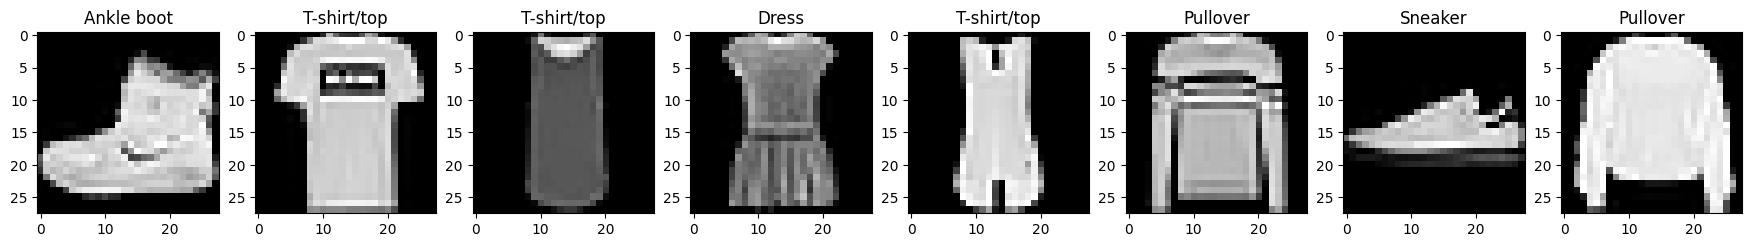

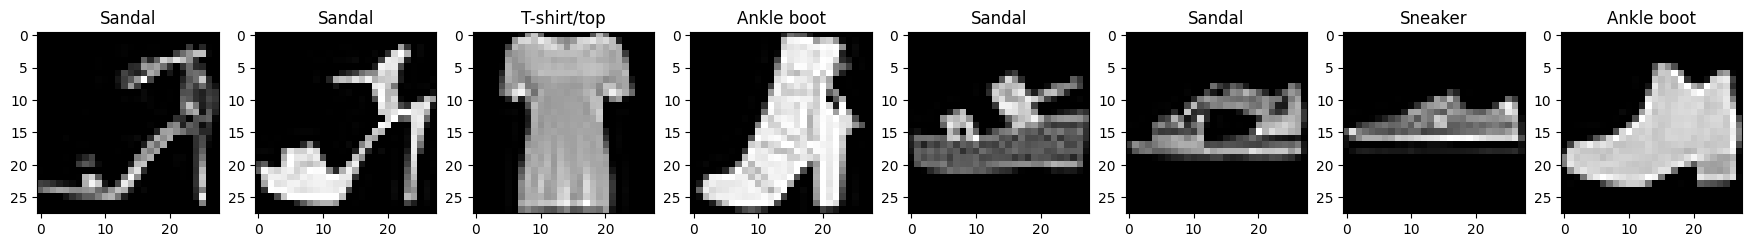

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i],cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8],train_labels[:8],ncols=8)
show_images(train_images[8:16],train_labels[8:16],ncols=8)

### Dense Layer를 기반으로 모델생성

<img src="./img/a.jpg">

In [8]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [10]:
INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE,INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
# verbose = 0 : 수행내용 출력x
# verbose = 1 : 자세히 출력
# verbose = 2 : 축약도니 정보
history = model.fit(x=train_images,y=train_oh_labels,batch_size=32,epochs=20,verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9533 - accuracy: 0.4221
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2648 - accuracy: 0.4747
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0523 - accuracy: 0.5682
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8311 - accuracy: 0.6696
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6842 - accuracy: 0.7404
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6100 - accuracy: 0.7654
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5754 - accuracy: 0.7786
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.7921
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5210 - accuracy: 0.8084
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.500

In [15]:
print(history.history['loss'])
print(history.history['accuracy'])

[1.95328950881958, 1.2647595405578613, 1.052251935005188, 0.8310939073562622, 0.6842177510261536, 0.6100113391876221, 0.5753709077835083, 0.5505523681640625, 0.5210287570953369, 0.5009369254112244, 0.49093014001846313, 0.47739556431770325, 0.47198089957237244, 0.46285784244537354, 0.439782977104187, 0.4067923128604889, 0.398615300655365, 0.38339170813560486, 0.3796740174293518, 0.37464797496795654]
[0.42206665873527527, 0.47468334436416626, 0.5682166814804077, 0.6695833206176758, 0.7403666377067566, 0.7653833627700806, 0.7785833477973938, 0.7921000123023987, 0.8083999752998352, 0.8150666952133179, 0.8185999989509583, 0.8218333125114441, 0.8256999850273132, 0.8313000202178955, 0.852816641330719, 0.8613166809082031, 0.8661166429519653, 0.8689333200454712, 0.8706666827201843, 0.8744333386421204]


In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [18]:
pred_proba[0]

array([3.6951340e-30, 1.6878532e-33, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 8.6699538e-03, 0.0000000e+00, 4.7917991e-05,
       2.8420257e-28, 9.9128211e-01], dtype=float32)

In [19]:
pred_proba[0].sum()

1.0

In [21]:
pred_proba[0].argmax()

9

In [22]:
pred_proba[0].max()

0.9912821

In [24]:
# predict 입력값으로 2차원을 넣으면 오류가 날 수가 있음, 3차원으로 만들어 주는것이 좋음
pred_proba = model.predict(test_images[0])

1/1 [==============================] - 0s 69ms/step


In [25]:
test_images[0].shape

(28, 28)

In [26]:
np.expand_dims(test_images[0],axis=0).shape

(1, 28, 28)

In [29]:
pred_proba = model.predict(np.expand_dims(test_images[0],axis=0))
print('softmax output',pred_proba)
print(pred_proba.shape)

1/1 [==============================] - 0s 21ms/step
softmax output [[3.6951343e-30 1.6878405e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00
  8.6698886e-03 0.0000000e+00 4.7917994e-05 2.8420262e-28 9.9128222e-01]]
(1, 10)


In [30]:
np.squeeze(pred_proba)

array([3.6951343e-30, 1.6878405e-33, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 8.6698886e-03, 0.0000000e+00, 4.7917994e-05,
       2.8420262e-28, 9.9128222e-01], dtype=float32)

In [31]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [33]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [34]:
train_images[30]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, \
                                                                test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, \
                              val_labels.shape)
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [36]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x=tr_images, y=tr_oh_labels,batch_size=128,validation_data=(val_images,val_oh_labels),epochs=20,verbose=1)

Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.6148 - accuracy: 0.7899 - val_loss: 0.4676 - val_accuracy: 0.8339
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.8527 - val_loss: 0.4212 - val_accuracy: 0.8502
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8669 - val_loss: 0.3929 - val_accuracy: 0.8568
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8719 - val_loss: 0.3794 - val_accuracy: 0.8620
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8797 - val_loss: 0.3583 - val_accuracy: 0.8709
Epoch 6/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8846 - val_loss: 0.3548 - val_accuracy: 0.8729
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.8894 - val_loss: 0.3435 - val_accuracy: 0.8760
Epoch 

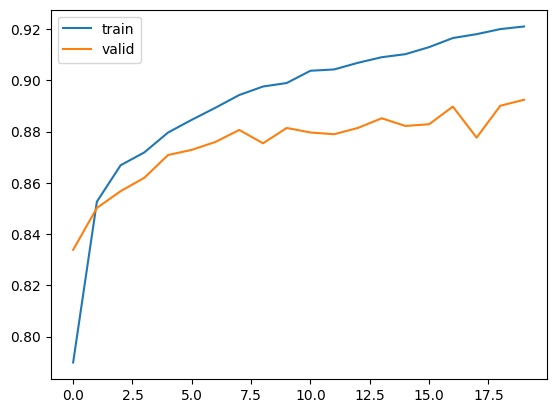

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

In [39]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8860


[0.3425835371017456, 0.8859999775886536]